In [4]:
#libraries
import pandas as pd
import sys 
from imblearn.over_sampling import SMOTE
import seaborn as sns # used for plot interactive graph. 
import numpy as np # linear algebra
from scipy.stats import randint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # this is used for the plot the graph 
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 7]

In [5]:
#importing the dataset
data = pd.read_csv("wh.csv")
data = data.drop(['Formatted Date','Summary','Daily Summary','Loud Cover'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               95936 non-null  object 
 1   Temperature (C)           96453 non-null  float64
 2   Apparent Temperature (C)  96453 non-null  float64
 3   Humidity                  96453 non-null  float64
 4   Wind Speed (km/h)         96453 non-null  float64
 5   Wind Bearing (degrees)    96453 non-null  float64
 6   Visibility (km)           96453 non-null  float64
 7   Pressure (millibars)      96453 non-null  float64
dtypes: float64(7), object(1)
memory usage: 5.9+ MB


In [6]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [7]:
data['precip'] = np.where(data['Precip Type']!= 'snow', 1, 0)
data.head(20)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),precip
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,1
5,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66,1
6,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72,1
7,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84,1
8,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37,1
9,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22,1


In [16]:
# data is highly skewed, need to use data sampling to make it even
data['precip'].value_counts()

1    85741
0    10712
Name: precip, dtype: int64

In [8]:
#data correlation table
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),precip
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447,0.562620
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219,0.565207
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454,-0.232113
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263,0.067928
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651,0.041984
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818,0.312875
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000,-0.009008
precip,0.562620,0.565207,-0.232113,0.067928,0.041984,0.312875,-0.009008,1.000000


<AxesSubplot:>

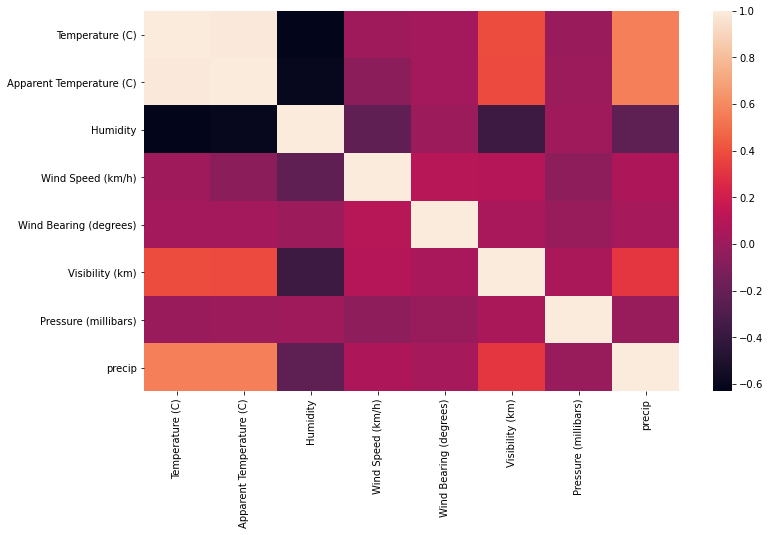

In [9]:
sns.heatmap(data.corr())

In [ ]:
#pairplot
sns.pairplot(data, hue='Precip Type')

In [ ]:
#smote (Synthetic minority oversampling technique)
X = np.array(data.drop(['Precip Type','precip'],axis=1)) #independent variable
Y = np.array(data['precip']) #target variable

#Sampling the dataset
sm = SMOTE(random_state=1999)
X,Y = sm.fit_sample(X, Y.ravel())

#splitting the data for training and testing
trainx, testx, trainy, testy = train_test_split(X, Y, test_size=0.4, random_state=1999)

#standardizing the data

print("After OverSampling, counts of label '1': {}".format(sum(Y==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(Y==0)))


In [34]:
df = pd.DataFrame(X, columns=['C1','C2','C3','c4','c5','c6','c7'])
df['c8'] = Y
df

,C1,C2,C3,c4,c5,c6,c7,c8
0,9.472222,7.388889,0.890000,14.119700,251.000000,15.826300,1015.130000,1
1,9.355556,7.227778,0.860000,14.264600,259.000000,15.826300,1015.630000,1
2,9.377778,9.377778,0.890000,3.928400,204.000000,14.956900,1015.940000,1
3,8.288889,5.944444,0.830000,14.103600,269.000000,15.826300,1016.410000,1
4,8.755556,6.977778,0.830000,11.044600,259.000000,15.826300,1016.510000,1
...,...,...,...,...,...,...,...,...
171477,-3.732298,-7.376382,0.806254,8.796995,324.791546,3.574927,1022.819212,0
171478,-11.022345,-13.732844,0.886079,5.399802,190.801133,1.694067,1029.704896,0
171479,-3.658368,-3.658368,0.844809,3.386454,132.819660,7.979178,1029.706011,0
171480,-7.170405,-12.833581,0.909670,13.454295,170.000000,3.825419,1015.671406,0


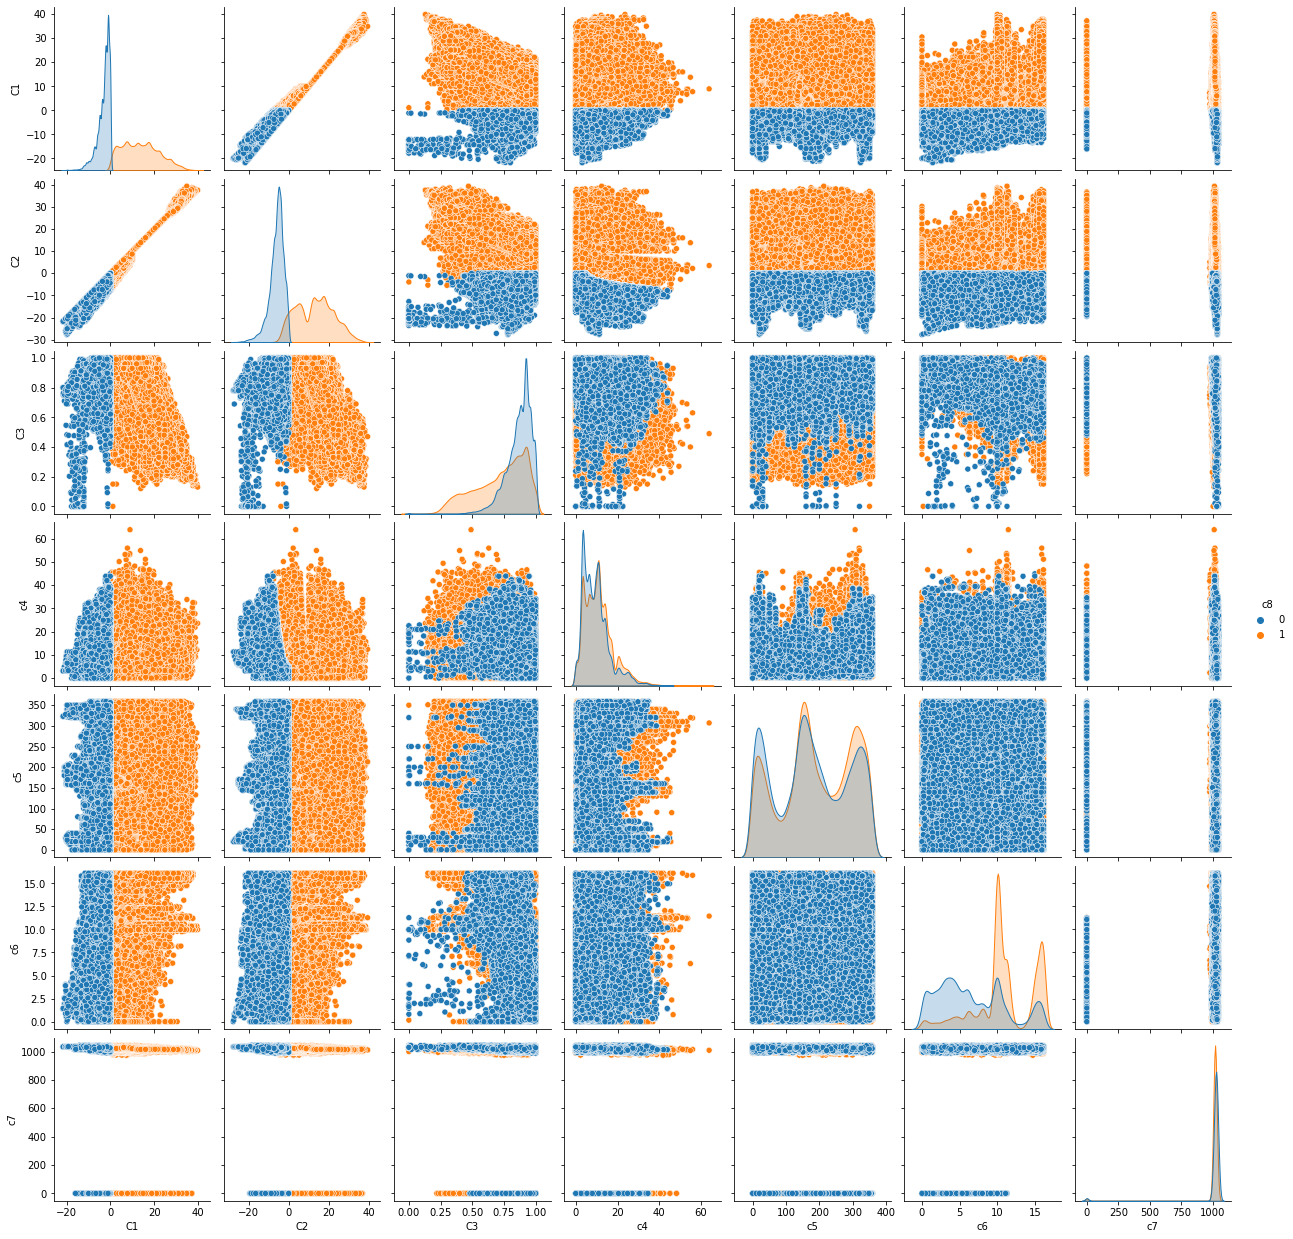

In [35]:
sns.pairplot(df,hue='c8')

In [44]:
df.describe()

,C1,C2,C3,c4,c5,c6,c7,c8
count,171482.000000,171482.000000,171482.000000,171482.000000,171482.000000,171482.000000,171482.000000,171482.000000
mean,5.308155,3.395700,0.791653,10.222067,182.083649,8.689203,1004.602534,0.500000
std,10.555997,11.903473,0.173297,6.686557,108.312326,4.700176,123.531974,0.500001
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.331458,-5.587944,0.712922,4.958800,102.663897,4.611140,1013.400000,0.000000
50%,0.002778,-1.261115,0.844388,9.450700,174.969759,9.934138,1019.050000,0.500000
75%,13.222222,13.222222,0.920000,13.588400,284.088370,11.270000,1025.692622,1.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000,1.000000
